머신러닝(Machine Learning)
===
- 기계학습(데이터를 통해 기계가 스스로 학습하게 하는 방법)
- "경험"을 통해 자동으로 개선(학습)하는 컴퓨터 알고리즘 연구이다.

---

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Numpy로 행렬 다루기

In [15]:
A = np.array([
    [1, -1, 2],
    [3, 2, 2],
    [4, 1, 2],
    [7, 5, 6]
])

print(A.shape)  # 4행 3열인 행렬 A
print(A[0][2])  # 행렬에서 원소 추출

(4, 3)
2


In [8]:
B = np.random.rand(3, 5)
B

array([[0.53134111, 0.68490847, 0.64325906, 0.72870813, 0.92973671],
       [0.82279188, 0.25966504, 0.6516848 , 0.25227316, 0.10907943],
       [0.66780735, 0.64829662, 0.44850245, 0.91505406, 0.35489988]])

#### 1) 행렬의 요소별 곱하기

In [24]:
A = np.array([
    [1, -1, 2],
    [3, 2, 2]
])

B = np.array([
    [4, 1, 2],
    [7, 5, 6]
])

A * B  # 행렬의 요소별로 곱한다.

array([[ 4, -1,  4],
       [21, 10, 12]])

#### 2) 행렬의 내적(Dot product)

In [25]:
B_transpose = B.T  # 전치 행렬(Transpose)
A @ B_transpose  # = np.dot(A, B)

array([[ 7, 14],
       [18, 43]])

#### 3) 역행렬(Inverse Matrix)

In [29]:
C = np.array([
    [3, 1, 2],
    [-2, 3, 1],
    [5, 1, 0]
])

C_inverse = np.linalg.pinv(C)  # 역행렬을 구한다.
C_inverse

C @ C_inverse  # 기존 행렬과 역행렬을 내적하면, 단위 행렬이 나온다.

array([[ 1.00000000e+00, -1.11022302e-16,  1.11022302e-16],
       [ 1.11022302e-16,  1.00000000e+00, -1.66533454e-16],
       [-2.49800181e-16,  5.55111512e-17,  1.00000000e+00]])

---

## 2. 선형 회귀(Linear Regression)
- 종속 변수 y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법
- "지도학습"에 해당한다.
- 목표 변수(Target Variable / Output Variable) : 맞추려고 하는 값
- 입력 변수(Input Variable / Feature) : 맞추는데 사용한 값
- 가설함수(Hypothesis Function) : 데이터에 가장 잘 맞는 선(최적선)을 찾기 위해 시도해보는 모든 함수
    - $h(x) = \theta_0 + \theta_1 x$
    - $h(x) = \theta_0x_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 ...\;(x_0=1)$
- 선형회귀 : 가장 적절한 $\theta$ 값들을 찾아내는 것 (데이터가 가장 잘 맞는 가설함수를 찾는 것)

#### 1) 평균 제곱 오차(Mean Squared Error)
- 가설함수를 평가하는 방법 중 하나이다.
- 오차의 제곱을 더하는 이유 : 1) 오차를 양수로 통일하기 위해   2) 더 큰 오차를 부각하기 위해
- $\frac{1}{m}\displaystyle\sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)}) ^2 $ 

#### 2) 손실 함수(Loss Function)
- 가설함수의 성능을 평가하는 함수
- 손실함수가 작을수록, 가설 함수가 데이터에 더 잘 맞는다.
- $J(\theta) = \frac{1}{2m}\displaystyle\sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)}) ^2 $

#### 3) 경사하강법(Gradient descent)
- **손실함수의 "극소점"을 찾아가는 방법**(최솟값을 보장하지는 않는다.)
- **기울기 벡터는 "가장 가파르게 올라가는 방향"을 알려준다.** 라는 성질을 이용하여,</br>
함수의 기울기(gradient)에 따라, x의 값을 어디로 옮겼을 때 함수가 극솟값을 갖는지 알아보는 방법이다.</br></br>

- "1) 기울기가 양수일 때, 양의 방향으로 이동하면 함숫값이 커지고, 음의 방향으로 이동하면 함숫값이 작아진다.</br>
 $\;$2) 기울기가 음수일 때, 양의 방향으로 이동하면 함숫값이 작아지고, 음의 방향으로 이동하면 함숫값이 커진다."</br></br>
 
- 경사 하강법 일반화 )</br></br>
$\,$ $\theta_0 \leftarrow \theta_0 - \alpha \frac{\partial}{\partial \theta_0} J{(\theta_0,\, \theta_1)} \;, \quad \theta_1 \leftarrow \theta_1 - \alpha \frac{\partial}{\partial \theta_1} J{(\theta_0,\, \theta_1)} \;$  $(\alpha>0)$ </br></br>
※ $\alpha$는 학습률로, 경사를 타고 내려갈 때, 얼마나 많이 움직일지 그 정도를 나타낸다.</br></br>
이를 풀어서 표현하면,</br></br>
$\theta_0 \leftarrow \theta_0 - \alpha \frac{1}{m}\displaystyle\sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)}) \;, \quad \theta_1 \leftarrow \theta_1 - \alpha \frac{1}{m}\displaystyle\sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)}) \, \cdot \, x^{(i)}$ 이 된다. 

- 가설함수 $h(x) = \theta_0 + \theta_1 x$ 에서 입력 변수 $x$를 벡터로 나타내면,</br></br>
" $x =  \begin{pmatrix}
  x^{(1)} \\
  x^{(2)} \\
  \vdots  \\
  x^{(n)} 
 \end{pmatrix}$ " 꼴로 나타낼 수 있다. 이를 기존의 가설함수에 대입하면, </br>
 " $h_{\theta}(x) = \theta_0 + \theta_1 \begin{pmatrix}
  x^{(1)} \\
  x^{(2)} \\
  \vdots  \\
  x^{(n)} 
 \end{pmatrix}$ =  $\begin{pmatrix}
  h_{\theta}(x^{(1)}) \\
  h_{\theta}(x^{(2)}) \\
  \vdots  \\
  h_{\theta}(x^{(n)})
 \end{pmatrix}$ " 이 된다.</br></br>목표 변수 $y$도 벡터로 생각했을 때, </br></br>
 $error = h_{\theta}(x) - y = \begin{pmatrix}
  h_{\theta}(x^{(1)}) - y^{(1)} \\
  h_{\theta}(x^{(2)}) - y^{(2)} \\
  \vdots  \\
  h_{\theta}(x^{(n)}) - y^{(n)}
 \end{pmatrix}$ 의 꼴로 나타낼 수 있다. ($error$는 오차이다.)</br></br>
 벡터 $error$의 모든 원소의 평균을 "$\mu_{error}$"라고 할 때, $\theta_0$를 업데이트하는 공식을 다음과 같이 나타낼 수 있다.</br></br>
 $$\theta_0 \leftarrow \theta_0 - \alpha \, \cdot \, \mu_{error}$$ </br></br>
 $\theta_0$를 업데이트하는 공식을 구하기 전에, $error \bullet x = \begin{pmatrix}
  (h_{\theta}(x^{(1)}) - y^{(1)}) \cdot x^{(1)} \\
  (h_{\theta}(x^{(2)}) - y^{(2)}) \cdot x^{(2)} \\
  \vdots  \\
  (h_{\theta}(x^{(n)}) - y^{(n)}) \cdot x^{(n)}
 \end{pmatrix}$ 꼴로 정의하자. 이 수식을 이용하면,</br></br>
  $$\theta_0 \leftarrow \theta_0 - \alpha \, \cdot \, \mu_{error \bullet x}$$</br>
  로 $\theta_0$를 업데이트하는 공식을 표현할 수 있다.
  
 

#### 4) 코드 작성

In [56]:
def prediction(theta_0, theta_1, x):
    """주어진 학습 데이터 벡터 x에 대한 예측값을 리턴하는 함수"""
    return theta_0 + theta_1 * x

# 입력 변수(집 크기) 초기화 (모든 집 평수 데이터를 1/10 크기로 줄임)
house_size = np.array([0.9, 1.4, 2, 2.1, 2.6, 3.3, 3.35, 3.9, 4.4, 4.7, 5.2, 5.75, 6.7, 6.9])

theta_0 = -3  # theta 값들 초기화 (아무 값이나 시작한다.)
theta_1 = 2

prediction(theta_0, theta_1, house_size)

array([-1.2, -0.2,  1. ,  1.2,  2.2,  3.6,  3.7,  4.8,  5.8,  6.4,  7.4,
        8.5, 10.4, 10.8])

In [21]:
def prediction_difference(theta_0, theta_1, x, y):
    """모든 예측값들과 목표 변수들의 오차(error)를 벡터로 리턴해주는 함수"""
    return prediction(theta_0, theta_1, x) - y

# 목표 변수(집 가격) 초기화 (모든 집 값 데이터를 1/10 크기로 줄임)
house_price = np.array([0.3, 0.75, 0.45, 1.1, 1.45, 0.9, 1.8, 0.9, 1.5, 2.2, 1.75, 2.3, 2.49, 2.6])

prediction_difference(theta_0, theta_1, house_size, house_price)  # error 벡터를 얻을 수 있다.

array([-1.5 , -0.95,  0.55,  0.1 ,  0.75,  2.7 ,  1.9 ,  3.9 ,  4.3 ,
        4.2 ,  5.65,  6.2 ,  7.91,  8.2 ])

In [51]:
def gradient_descent(theta_0, theta_1, x, y, iterations, alpha):
    """주어진 theta_0, theta_1 변수들을 경사 하강를 하면서 업데이트 해주는 함수"""
    for i in range(iterations):
        error = prediction_difference(theta_0, theta_1, x, y)  # 오차(error)를 구한다.

        theta_0 = theta_0 - alpha * error.mean()  # theta_0 업데이트
        theta_1 = theta_1 - alpha * (error * x).mean()  # theta_1 업데이트

    return theta_0, theta_1

# 학습률 0.1로 200번 경사 하강
theta_0, theta_1 = gradient_descent(theta_0, theta_1, house_size, house_price, 200, 0.1)

theta_0, theta_1

(0.020833746512486703, 0.3755753912006189)

#### ※ 경사 하강법 구현 시각화 )

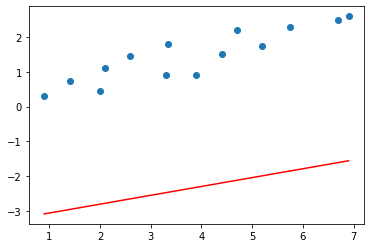

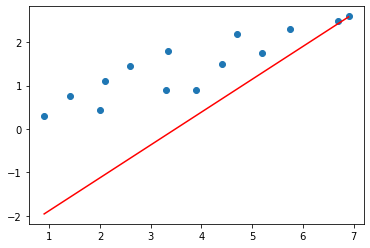

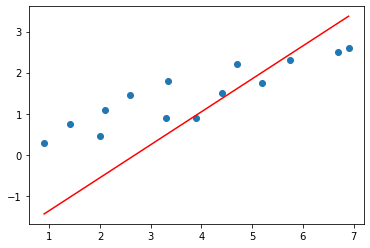

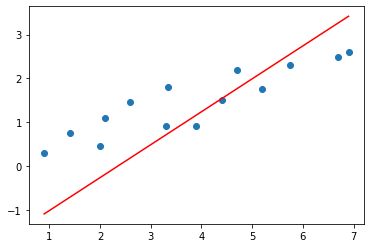

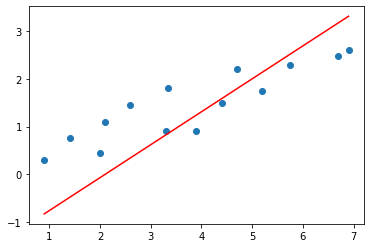

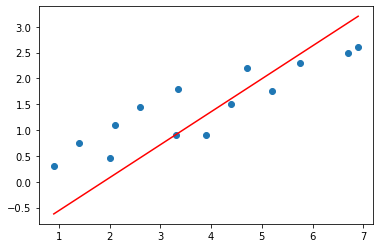

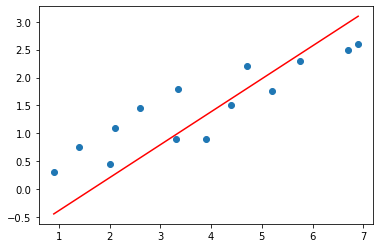

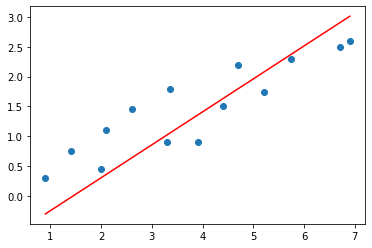

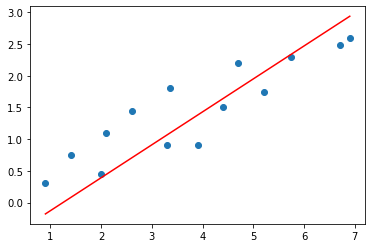

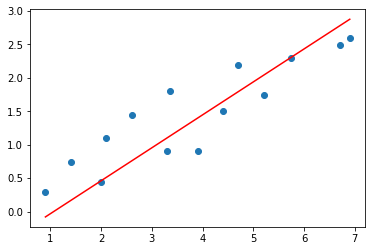

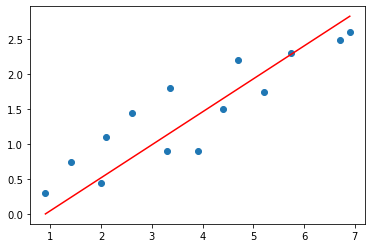

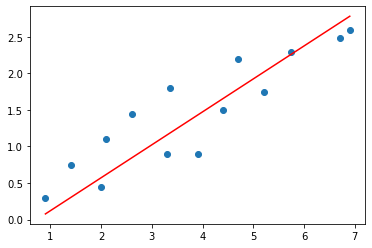

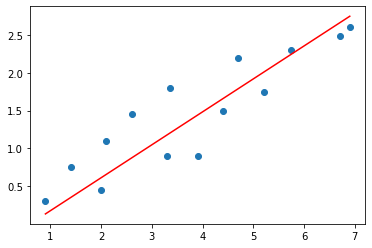

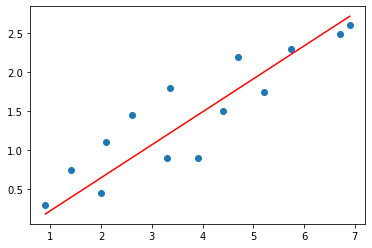

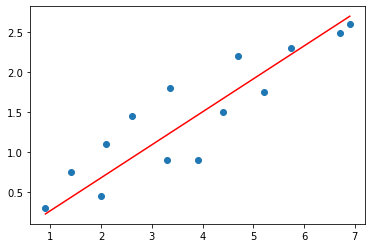

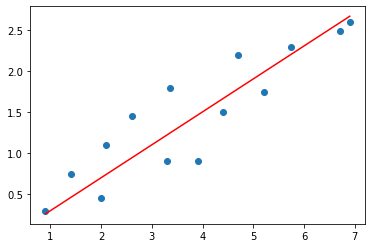

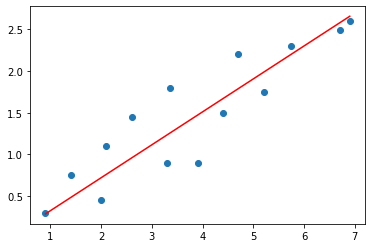

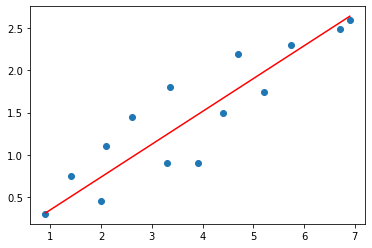

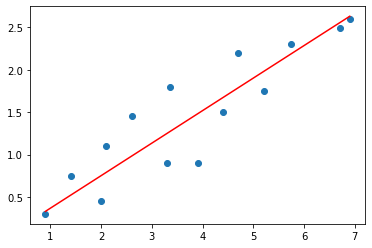

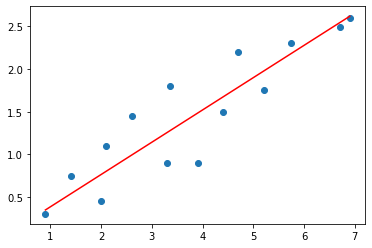

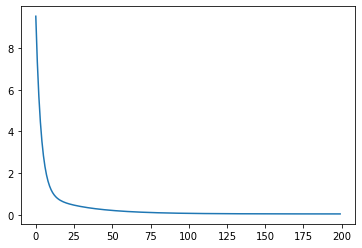

In [67]:
def gradient_descent(theta_0, theta_1, x, y, iterations, alpha):
    """주어진 theta_0, theta_1 변수들을 경사 하강를 하면서 업데이트 해주는 함수"""
    m = len(x)
    cost_list = []
    
    for i in range(iterations):
        error = prediction_difference(theta_0, theta_1, x, y)  # 오차(error)를 구한다.
        cost = error @ error / (2 * m)  # (오차 제곱의 평균) / 2 -> 손실 함숫값
        cost_list.append(cost)

        theta_0 = theta_0 - alpha * error.mean()  # theta_0 업데이트
        theta_1 = theta_1 - alpha * (error * x).mean()  # theta_1 업데이트
        
        if i % 10 == 0:  # 10을 주기로 가설함수(plot)를 그린다.
            plt.scatter(x, y)
            plt.plot(x, prediction(theta_0, theta_1, x), color = 'red')
            plt.show()

    return theta_0, theta_1, cost_list

theta_0 = -3  # theta 값들 초기화 (아무 값이나 시작한다.)
theta_1 = 2

# 학습률 0.1로 200번 경사 하강
theta_0, theta_1, cost_list = gradient_descent(theta_0, theta_1, house_size, house_price, 200, 0.1)

plt.plot(cost_list)  # 손실 함수를 그린다.

#### 5) 모델 평가
- **Training Set(학습 데이터)을 이용하여 모델을 학습**시키고, **Test Set(테스트 데이터)을 통해 모델을 평가**한다.
- 이때, 모델의 성능은 **평균 제곱근 오차(Root Mean Square Error)**로 평가한다.

In [126]:
# scikit-learn (sklearn)
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [93]:
boston_dataset = load_boston()
print(boston_dataset.DESCR)  # desription

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [75]:
boston_dataset.feature_names  # dataset의 속성 이름을 array로 반환

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [76]:
boston_dataset.data  # dataset의 입력변수를 matrix로 반환

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [79]:
boston_dataset.data.shape  # 506개의 데이터, 13개의 속성

(506, 13)

In [80]:
boston_dataset.target  # 목표 변수 (506개)

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [103]:
x = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [110]:
x = x[['AGE']]  # 입력 변수
x

,AGE
0,65.2
1,78.9
2,61.1
3,45.8
4,54.2
...,...
501,69.1
502,76.7
503,91.0
504,89.3


In [111]:
y = pd.DataFrame(boston_dataset.target, columns = ['MEDV'])  # 목표 변수
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [129]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [113]:
model = LinearRegression()

In [114]:
model.fit(x_train, y_train)

LinearRegression()

In [119]:
model.coef_  # theta_1의 값을 얻는다.

array([[-0.12402883]])

In [121]:
model.intercept_  # theta_0의 값을 얻는다.  따라서 f(x) = 31.04617413x -0.12402883

array([31.04617413])

In [125]:
y_test_prediction = model.predict(x_test)
y_test_prediction  # 모델을 통한 예측값

array([[20.31768041],
       [28.14389953],
       [22.84786852],
       [18.64329122],
       [24.62148078],
       [19.99520545],
       [19.75955068],
       [22.79825699],
       [20.92542167],
       [21.74401194],
       [23.29437231],
       [25.41526529],
       [21.53316293],
       [25.94858925],
       [23.76568186],
       [24.55946636],
       [18.64329122],
       [18.64329122],
       [22.00447248],
       [18.64329122],
       [18.89134887],
       [18.90375176],
       [21.33471681],
       [22.71143681],
       [28.46637448],
       [19.06498923],
       [24.31140871],
       [22.05408402],
       [26.32067574],
       [26.59353916],
       [19.0153777 ],
       [18.85414022],
       [19.30064401],
       [18.7301114 ],
       [28.76404367],
       [18.92855752],
       [21.5579687 ],
       [19.21382383],
       [19.69753626],
       [29.08651863],
       [19.56110455],
       [18.64329122],
       [21.02464473],
       [20.14404005],
       [24.72070384],
       [25

In [127]:
mean_squared_error(y_test, y_test_prediction) ** 0.5  # RMSE 를 이용한 성능 평가

8.236881612652455

---

## 3. 다중 선형 회귀(Multiple Linear Regression)
- 시각적인 표현은 힘들지만, 개념적으로는 단순 선형 회귀와 동일
- 여러 개의 독립(입력) 변수 $x$(features)들을 가지고 종속변수 $y$를 예측하기 위한 회귀 모형을 만드는 것이 목적

- 가설 함수는 다음과 같이 나타낸다.</br></br>
$\quad h_{\theta}(x) = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \theta_4 x_4 \; ... \theta_n x_n \quad (단, x_0 = 1)$</br></br>
이는 벡터를 사용하여 다음과 같이 표현할 수 있다.</br></br> $\theta = \begin{pmatrix}\theta_0 \\ \theta_1 \\ \theta_3 \\ \vdots \\ \theta_n \end{pmatrix}\;$ ,  $\quad x = \begin{pmatrix}1 \\ x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix}$ $\qquad \Rightarrow \qquad h_{\theta}(x) = \theta^T x$</br></br>
다중 선형 회귀 모델에서도, 동일한 손실함수를 사용한다. (손실함수가 작을수록 가설함수가 데이터에 잘 맞는다.)</br></br>
$$J(\theta) = \frac{1}{2m}\displaystyle\sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)}) ^2 $$</br></br>
다중 선형 회귀의 경사 하강법도 단순 선형 회귀와 똑같은데, 단지 $\theta$값들이 많을 뿐이다.</br></br>
$$\theta_0 \leftarrow \theta_0 - \alpha \frac{1}{m}\displaystyle\sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)}) \, \cdot \, x_0^{(i)} \;$$</br>
$$\theta_1 \leftarrow \theta_1 - \alpha \frac{1}{m}\displaystyle\sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)}) \, \cdot \, x_1^{(i)} \;$$</br>
$$\theta_2 \leftarrow \theta_2 - \alpha \frac{1}{m}\displaystyle\sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)}) \, \cdot \, x_2^{(i)} \;$$
$$\vdots$$
$$\theta_n \leftarrow \theta_n - \alpha \frac{1}{m}\displaystyle\sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)}) \, \cdot \, x_n^{(i)} \;$$</br></br>
다중 선형 회귀에서는 속성(features, 입력 변수)이 여러 개이므로, 데이터를 다음과 같이 표현한다.</br>
( ※ 위 첨자 : 몇 번째 데이터인지 / 아래 첨자 : 몇 번째 속성인지 )</br></br>
$$X_{m,n} = \begin{pmatrix} x_0^{(1)} & x_1^{(1)} & \cdots & x_n^{(1)} \\ x_0^{(2)} & x_1^{(2)} & \cdots & x_n^{(2)} \\ \vdots \\  x_0^{(m)} & x_1^{(m)} & \cdots & x_n^{(m)}\end{pmatrix}$$</br></br>
이처럼 입력 변수 데이터를 행렬로 묶어서 표현한 걸 설계행렬(Design Matrix)라고 한다.</br></br>
모든 데이터에 대한 예측 값은 $\theta$ 벡터와 함께 두 행렬의 곱으로 나타낼 수 있다.</br></br>
$$X \cdot \theta = \begin{pmatrix} x_0^{(1)} & x_1^{(1)} & \cdots & x_n^{(1)} \\ x_0^{(2)} & x_1^{(2)} & \cdots & x_n^{(2)} \\ \vdots \\  x_0^{(m)} & x_1^{(m)} & \cdots & x_n^{(m)}\end{pmatrix} \, \times \, \begin{pmatrix}\theta_0 \\ \theta_1 \\ \theta_3 \\ \vdots \\ \theta_n \end{pmatrix} \; =
\; \begin{pmatrix} \theta_0 x_0^{(1)} & \theta_1 x_1^{(1)} & \cdots & \theta_n x_n^{(1)} \\ \theta_0 x_0^{(2)} & \theta_1 x_1^{(2)} & \cdots & \theta_n x_n^{(2)} \\ \vdots \\ \theta_0 x_0^{(m)} & \theta_1 x_1^{(m)} & \cdots & \theta_n x_n^{(m)}\end{pmatrix} \; =  \;
\begin{pmatrix} h_\theta (x^{(1)}) \\ h_\theta (x^{(2)}) \\ \vdots \\ h_\theta (x^{(m)}) \end{pmatrix}
$$</br></br>
각 데이터의 목표 변수는 값이 하나이므로 단순 선형 회귀와 마찬가지로 $y = \begin{pmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(n)} \end{pmatrix}$ 이므로,</br></br>

$$error \; = \; X \theta - y \; = \; \begin{pmatrix} h_\theta (x^{(1)}) \\ h_\theta (x^{(2)}) \\ \vdots \\ h_\theta (x^{(m)}) \end{pmatrix} \; - \; \begin{pmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \end{pmatrix} \; = \; \begin{pmatrix} h_\theta (x^{(1)}) - y^{(1)} \\ h_\theta (x^{(2)}) - y^{(2)} \\ \vdots \\ h_\theta (x^{(m)}) - y^{(m)} \end{pmatrix} $$</br></br>
모든 예측값들과 목표 변수의 차이를 간단한 행렬 연산으로 구할 수 있다.</br></br>
경사 하강법 공식도 마찬가지로, 다음과 같이 간단한 행렬 연산으로 나타낼 수 있다.</br></br>
$$\theta \; \leftarrow \; \theta - \; \alpha \frac{1}{m} (X^T \cdot error)$$</br></br>
$$(\quad X^T \cdot error \; = \; \begin{pmatrix} x_0^{(1)} & x_0^{(2)} & \cdots & x_0^{(m)} \\ x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\ \vdots \\  x_n^{(1)} & x_n^{(2)} & \cdots & x_n^{(m)}\end{pmatrix} \; \times \; 
\begin{pmatrix} h_\theta (x^{(1)}) - y^{(1)} \\ h_\theta (x^{(2)}) - y^{(2)} \\ \vdots \\ h_\theta (x^{(m)}) - y^{(m)} \end{pmatrix} \; = \; 
\begin{pmatrix} \displaystyle\sum_{i=1}^m{(h_{\theta}(x^{(i)}) - y^{(i)})} \cdot x_0^{(i)} \\ \displaystyle\sum_{i=1}^m {(h_{\theta}(x^{(i)}) - y^{(i)})} \cdot x_2^{(i)} \\ \vdots \\ \displaystyle\sum_{i=1}^m {(h_{\theta}(x^{(i)}) - y^{(i)})} \cdot x_n^{(i)} \end{pmatrix} 
\quad ) $$</br></br>

#### 1) 코드 작성

In [140]:
import numpy as np

def prediction(X, theta):
    """다중 선형 회귀 가정 함수. 모든 데이터에 대한 예측 값을 numpy 배열로 리턴한다"""
    return X @ theta

def gradient_descent(X, theta, y, iterations, alpha):
    """다중 선형 회귀 경사 하강법을 구현한 함수"""
    m = len(X)  # 입력 변수 데이터 개수 저장
    
    for i in range(iterations):
        error = prediction(X, theta) - y  # error(오차)를 구한다.
        theta = theta - alpha * (1 / m) * (X.T @ error)  # theta를 업데이트 해준다.
    
    return theta

# 입력 변수
house_size = np.array([1.0, 1.5, 1.8, 5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 8.5, 9.0, 10.0])  # 집 크기
distance_from_station = np.array([5, 4.6, 4.2, 3.9, 3.9, 3.6, 3.5, 3.4, 2.9, 2.8, 2.7, 2.3, 2.0, 1.8, 1.5, 1.0])  # 지하철역으로부터의 거리 (km)
number_of_rooms = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])  # 방 수

# 설계 행렬 X 정의
X = np.array([
    np.ones(16),
    house_size,
    distance_from_station,
    number_of_rooms
]).T

# 목표 변수
house_price = np.array([3, 3.2, 3.6 , 8, 3.4, 4.5, 5, 5.8, 6, 6.5, 9, 9, 10, 12, 13, 15])  # 집 가격

# 입력 변수 y 정의
y = house_price

theta = np.array([0, 0, 0, 0])  # 파라미터 theta 초기화

# 학습률 0.01로 100번 경사 하강
theta = gradient_descent(X, theta, y, 100, 0.01)

theta

array([0.11484521, 1.21120425, 0.18270523, 0.30060782])

#### 2) 정규 방정식

- 손실 함수가 $J(\theta) = \frac{1}{2m}\displaystyle\sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)}) ^2 $ 일 때, 정규방정식은 다음과 같다.</br></br>
$$\nabla J(\theta) = 0$$</br></br>
위 정규방정식을 풀면 최적의 $\theta$값들을 구할 수 있다.</br>
하지만 이 정규방정식을 매번 풀기에는 귀찮으므로, 다음 식을 통해 $\theta$값을 구한다.

$$\theta = (X^T X)^{-1} \cdot X^T y$$

In [139]:
def normal_equation(X, y):
    """설계 행렬 X와 목표 변수 벡터 y를 받아 정규 방정식으로 최적의 theta를 구하는 함수"""
    return (np.linalg.pinv(X.T@X))@X.T@y

# 입력 변수
house_size = np.array([1.0, 1.5, 1.8, 5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 8.5, 9.0, 10.0])  # 집 크기
distance_from_station = np.array([5, 4.6, 4.2, 3.9, 3.9, 3.6, 3.5, 3.4, 2.9, 2.8, 2.7, 2.3, 2.0, 1.8, 1.5, 1.0])  # 지하철역으로부터의 거리 (km)
number_of_rooms = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])  # 방 수

# 목표 변수
house_price = np.array([3, 3.2, 3.6 , 8, 3.4, 4.5, 5, 5.8, 6, 6.5, 9, 9, 10, 12, 13, 15])  # 집 가격

# 입력 변수 파라미터 X 정의
X = np.array([
    np.ones(16),
    house_size,
    distance_from_station,
    number_of_rooms
]).T

# 입력 변수 y 정의
y = house_price

# 정규 방적식으로 theta 계산
theta = normal_equation(X, y)
theta

array([ 5.24706322,  1.30727421, -0.68881811, -0.8709494 ])

#### 3) 경사 하강법과 정규 방정식의 장단점

- 1) **경사 하강법**
    - 장점 : 입력 변수의 개수 $n$이 커도 효율적으로 연산을 할 수 있다.
    - 단점 : 적합한 학습율 $\alpha$를 찾거나 정해야 한다. 반복문을 사용해야 한다, 
</br></br>
- 2) **정규 방정식**
    - 장점 : 한 단계로 계산을 끝낼 수 있다. 학습율 $\alpha$를 정할 필요가 없다.
    - 단점 : 입력 변수의 개수 $n$이 커지면 커질수록 월등히 비효율적이다. (행렬 연산을 하는 비용이 경사 하강법을 하는 것보다 크다)

#### 4) Convex 함수
- convex(아래로 볼록) 함수에선, 어떤 지점에서 경사 하강을 시작해도 항상 손실함수의 최소 지점을 찾을 수 있고, 정규 방정식을 이용해서 최소점을 구할 수 있다.
- 선형 회귀 손실 함수로 사용하는 MSE는 항상 convex 함수이다. </br>
따라서, 선형 회귀를 할 때, 경사 하강법을 하거나 정규 방정식을 하거나 항상 최적의 $\theta$ 값들을 구할 수 있다.

#### 5) 사이킷런(kikit-learn)을 활용한 다중 선형 회귀 모델 코드 작성

In [147]:
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [142]:
boston_dataset = load_boston()

In [145]:
X = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)  # 입력 변수
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [146]:
y = pd.DataFrame(boston_dataset.target, columns = ['MEDV'])

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)  # 트레이닝 셋, 테스트 셋 나누기

model = LinearRegression()  # (다중) 선형 회귀 모델
model.fit(X_train, y_train)  # 트레이닝 셋으로 모델 학습 시키기

LinearRegression()

In [151]:
model.coef_  # theta_1, theta_2, theta_3, ... , theta_n

array([[-1.30799852e-01,  4.94030235e-02,  1.09535045e-03,
         2.70536624e+00, -1.59570504e+01,  3.41397332e+00,
         1.11887670e-03, -1.49308124e+00,  3.64422378e-01,
        -1.31718155e-02, -9.52369666e-01,  1.17492092e-02,
        -5.94076089e-01]])

In [153]:
model.intercept_  # theta_0

array([37.91248701])

In [155]:
y_test_prediction = model.predict(X_test)  # 테스트 셋으로 예측값을 출력
y_test_prediction

array([[37.56311787],
       [32.14445143],
       [27.06573629],
       [ 5.67080633],
       [35.09982577],
       [ 5.85803701],
       [27.53708506],
       [31.81019188],
       [26.35634771],
       [22.77208748],
       [31.91183048],
       [21.50224061],
       [23.70119983],
       [33.3622504 ],
       [28.51633591],
       [14.39456899],
       [ 0.19284025],
       [18.66247155],
       [13.71004139],
       [14.13408635],
       [ 2.03263952],
       [19.7280831 ],
       [38.18657429],
       [24.19760058],
       [31.30247973],
       [11.14144544],
       [25.03636951],
       [23.27970871],
       [22.49420127],
       [20.52972594],
       [15.16513744],
       [ 6.92553586],
       [18.3557733 ],
       [22.37179804],
       [28.91287973],
       [19.02980786],
       [30.19357214],
       [ 8.74384915],
       [40.86691522],
       [34.53763591],
       [20.70224878],
       [ 2.59618963],
       [29.99590282],
       [12.15704798],
       [27.10186397],
       [30

In [157]:
evaluation = mean_squared_error(y_test, y_test_prediction) ** 0.5  # RMSE 를 통한 모델 성능 평가
evaluation

4.568292042303193